In [133]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

In [134]:
duplicate_code = ctrl.Antecedent(np.arange(0,100,1), 'duplicate_code')
long_method = ctrl.Antecedent(np.arange(0,100,1), 'long_method')
long_parameter_list = ctrl.Antecedent(np.arange(0,21,1), 'long_parameter_list')
temporary_field = ctrl.Antecedent(np.arange(0,100,1), 'temporary_field')
cyclomatic_complexity = ctrl.Antecedent(np.arange(0,100,1), 'cyclomatic_complexity')

In [135]:
code_quality = ctrl.Consequent(np.arange(0,100,1), 'code_quality')

c:\Program Files (x86)\Conda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


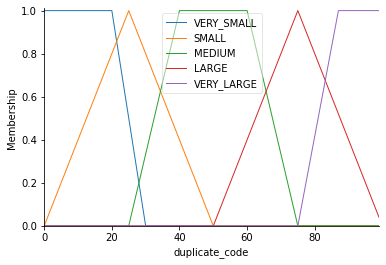

In [136]:
duplicate_code['VERY_SMALL'] = fuzz.trapmf(duplicate_code.universe, [0,0,20,30])
duplicate_code['SMALL'] = fuzz.trimf(duplicate_code.universe, [0,25,50])
duplicate_code['MEDIUM'] = fuzz.trapmf(duplicate_code.universe, [25,40,60,75])
duplicate_code['LARGE'] = fuzz.trimf(duplicate_code.universe, [50,75,100])
duplicate_code['VERY_LARGE'] = fuzz.trapmf(duplicate_code.universe, [75, 87, 100,100])
duplicate_code.view()

c:\Program Files (x86)\Conda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


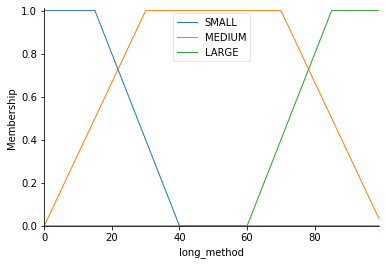

In [137]:
long_method['SMALL'] = fuzz.trapmf(long_method.universe, [0,0,15,40])
long_method['MEDIUM'] = fuzz.trapmf(long_method.universe, [0,30,70,100])
long_method['LARGE'] = fuzz.trapmf(long_method.universe, [60,85,100,100])
long_method.view()

c:\Program Files (x86)\Conda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


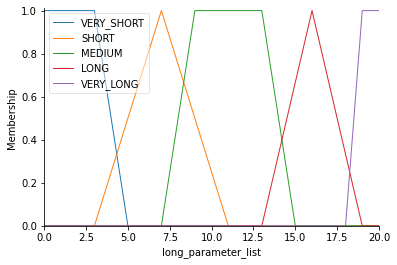

In [138]:
long_parameter_list['VERY_SHORT'] = fuzz.trapmf(long_parameter_list.universe, [0,0,3,5])
long_parameter_list['SHORT'] = fuzz.trimf(long_parameter_list.universe, [3,7,11])
long_parameter_list['MEDIUM'] = fuzz.trapmf(long_parameter_list.universe, [7,9,13,15])
long_parameter_list['LONG'] = fuzz.trimf(long_parameter_list.universe, [13,16,19])
long_parameter_list['VERY_LONG'] = fuzz.trapmf(long_parameter_list.universe, [18,19,21,21])
long_parameter_list.view()

c:\Program Files (x86)\Conda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


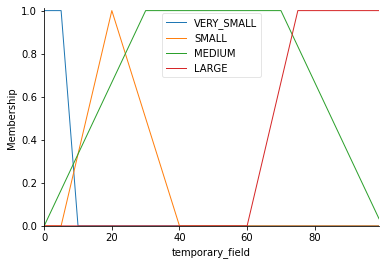

In [139]:
temporary_field['VERY_SMALL'] = fuzz.trapmf(temporary_field.universe, [0,0,5,10])
temporary_field['SMALL'] = fuzz.trimf(temporary_field.universe, [5,20,40])
temporary_field['MEDIUM'] = fuzz.trapmf(temporary_field.universe, [0,30,70,100])
temporary_field['LARGE'] = fuzz.trapmf(temporary_field.universe, [60,75,100, 100])
temporary_field.view()

c:\Program Files (x86)\Conda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


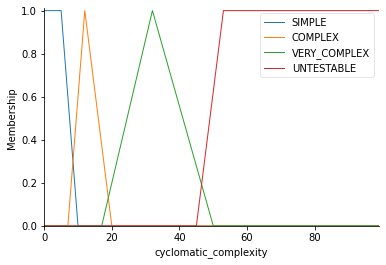

In [140]:
cyclomatic_complexity['SIMPLE'] = fuzz.trapmf(cyclomatic_complexity.universe, [0,0,5,10])
cyclomatic_complexity['COMPLEX'] = fuzz.trimf(cyclomatic_complexity.universe, [7,12,20])
cyclomatic_complexity['VERY_COMPLEX'] = fuzz.trimf(cyclomatic_complexity.universe, [17,32,50])
cyclomatic_complexity['UNTESTABLE'] = fuzz.trapmf(cyclomatic_complexity.universe, [45,53,100, 100])
cyclomatic_complexity.view()

c:\Program Files (x86)\Conda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


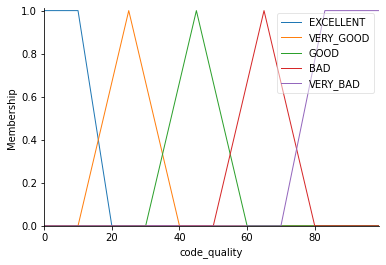

In [141]:
code_quality['EXCELLENT'] = fuzz.trapmf(code_quality.universe, [0,0,10,20])
code_quality['VERY_GOOD'] = fuzz.trimf(code_quality.universe, [10,25,40])
code_quality['GOOD'] = fuzz.trimf(code_quality.universe, [30,45,60])
code_quality['BAD'] = fuzz.trimf(code_quality.universe, [50,65,80])
code_quality['VERY_BAD'] = fuzz.trapmf(code_quality.universe, [70,83,100, 100])
code_quality.view()

In [142]:
rules = []

base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & long_method['SMALL']
    & (long_parameter_list['VERY_SHORT'] | long_parameter_list['SHORT'])
    & (temporary_field['SMALL'] | temporary_field['VERY_SMALL']))

rules.append(ctrl.Rule(
    base_rule
    & (cyclomatic_complexity['SIMPLE']),
    code_quality['EXCELLENT']))

rules.append(ctrl.Rule(
    base_rule
    & (cyclomatic_complexity['COMPLEX'] | cyclomatic_complexity['UNTESTABLE'] | cyclomatic_complexity['VERY_COMPLEX']),
    code_quality['VERY_GOOD']))

In [143]:
base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & long_method['SMALL']
    & (long_parameter_list['VERY_SHORT'] | long_parameter_list['SHORT'])
    & (cyclomatic_complexity['SIMPLE']))

rules.append(ctrl.Rule(
    base_rule
    & (temporary_field['MEDIUM'] | temporary_field['LARGE']),
    code_quality['VERY_GOOD']))

base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & long_method['SMALL']
    & (long_parameter_list['VERY_SHORT'] | long_parameter_list['SHORT'])
    & (cyclomatic_complexity['COMPLEX']))

rules.append(ctrl.Rule(
    base_rule
    & (temporary_field['SMALL']),
    code_quality['VERY_GOOD']))

rules.append(ctrl.Rule(
    base_rule
    & (temporary_field['MEDIUM'] | temporary_field['LARGE']),
    code_quality['GOOD']))

base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & long_method['SMALL']
    & (long_parameter_list['VERY_SHORT'] | long_parameter_list['SHORT'])
    & (cyclomatic_complexity['VERY_COMPLEX'] | cyclomatic_complexity['UNTESTABLE']))

rules.append(ctrl.Rule(
    base_rule
    & (temporary_field['SMALL']),
    code_quality['VERY_GOOD']))

rules.append(ctrl.Rule(
    base_rule
    & (temporary_field['MEDIUM'] | temporary_field['LARGE']),
    code_quality['GOOD']))


In [144]:
base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & long_method['SMALL']
    & (cyclomatic_complexity['SIMPLE']))

rules.append(ctrl.Rule(
    base_rule
    & (long_parameter_list['MEDIUM']),
    code_quality['VERY_GOOD']
))

rules.append(ctrl.Rule(
    base_rule
    & (long_parameter_list['LONG'] | long_parameter_list['VERY_LONG']),
    code_quality['GOOD']
))

base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & long_method['SMALL']
    & (cyclomatic_complexity['COMPLEX']))

rules.append(ctrl.Rule(
    base_rule
    & (long_parameter_list['MEDIUM'] | long_parameter_list['LONG'] | long_parameter_list['VERY_LONG']),
    code_quality['GOOD']
))

base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & long_method['SMALL']
    & (cyclomatic_complexity['VERY_COMPLEX'] | cyclomatic_complexity['UNTESTABLE']))

rules.append(ctrl.Rule(
    base_rule
    & (long_parameter_list['MEDIUM']),
    code_quality['GOOD']
))

rules.append(ctrl.Rule(
    base_rule
    & (long_parameter_list['LONG'] | long_parameter_list['VERY_LONG']),
    code_quality['BAD']
))

In [145]:
base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & (long_parameter_list['VERY_SHORT'] | long_parameter_list['SHORT']))

rules.append(ctrl.Rule(
    base_rule
    & long_method['MEDIUM'],
    code_quality['VERY_GOOD']
))

rules.append(ctrl.Rule(
    base_rule
    & long_method['LARGE'],
    code_quality['BAD']
))

base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & (long_parameter_list['MEDIUM']))

rules.append(ctrl.Rule(
    base_rule
    & (long_method['MEDIUM'] | long_method['LARGE']),
    code_quality['BAD']
))

base_rule = ((duplicate_code['VERY_SMALL'] | duplicate_code['SMALL'])
    & (long_parameter_list['LONG'] | long_parameter_list['VERY_LONG']))

rules.append(ctrl.Rule(
    base_rule
    & (long_method['MEDIUM'] | long_method['LARGE']),
    code_quality['VERY_BAD']
))

In [146]:
rules.append(ctrl.Rule(
    duplicate_code['MEDIUM'],
    code_quality['GOOD']
))

rules.append(ctrl.Rule(
    duplicate_code['LARGE'] | duplicate_code['VERY_LARGE'],
    code_quality['BAD']
))

OrderedDict([('duplicate_code', 1.7108435063736105), ('long_method', 7.209652984518522), ('long_parameter_list', 20.0), ('temporary_field', 29.090335299761595), ('cyclomatic_complexity', 74.14769649732649)])
OrderedDict([('code_quality', 70.89476737005668)])


c:\Program Files (x86)\Conda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


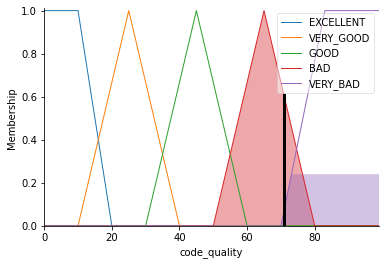

In [152]:
import random

robot_ctrl = ctrl.ControlSystem(rules)
robot = ctrl.ControlSystemSimulation(robot_ctrl)
robot.input['duplicate_code'] = random.uniform(0,50)
robot.input['long_method'] = random.uniform(0,100)
robot.input['long_parameter_list'] = random.uniform(0,21)
robot.input['temporary_field'] = random.uniform(0,100)
robot.input['cyclomatic_complexity'] = random.uniform(0,100)

print(robot.input._get_inputs())

# Crunch the numbers
robot.compute()
print(robot.output)
code_quality.view(sim=robot)